In [3]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
#import ruptures as rpt
import pandas as pd
import datetime
import ee
import folium
import geemap
import wbgapi as wb

In [8]:
from mpetools import get_info_islands

island_info = get_info_islands.retrieveInfoIslands('Nauru', 'Nauru')

-------------------------------------------------------------------
RETRIEVING ISLAND INFORMATION
Island: Nauru, Nauru
-------------------------------------------------------------------



AttributeError: Can't get attribute 'DateRange' on <module 'ee' from 'c:\\Users\\myriampe\\anaconda3\\envs\\islands-CI\\lib\\site-packages\\ee\\__init__.py'>

In [78]:
# import osmnx
import osmnx as ox
import geopandas as gpd
import networkx as nx
%matplotlib qt

# Specify the name that is used to seach for the data
place_name = "Nauru"
area = ox.geocode_to_gdf(place_name)

#area.plot()

#tags = {'buildings': True}   

#buildings = ox.geometries_from_place(place_name, tags)
#buildings.head()
#buildings.plot()

G = ox.graph_from_place(place_name, network_type="drive")
ox.save_graphml(G, filepath="./graph.graphml")
#fig, ax = ox.plot_graph(G)
M = ox.utils_graph.get_undirected(G)
D = ox.utils_graph.get_digraph(G)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
#gdf_edges.to_file('edges_Nauru.shp', driver='ESRI Shapefile')
gdf_edges.plot()

# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [66]:
%matplotlib qt

# get all building footprints in some neighborhood
place = "Villeray, Montreal"
tags = {'amenity': True, "landuse": True}
gdf = ox.geometries_from_place(place, tags)
gdf
#gdf.shape
#fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

geometry  \
element_type osmid                                                          
node         279559878                         POINT (-73.59655 45.56446)   
             281754799                         POINT (-73.60169 45.54870)   
             281870493                         POINT (-73.58727 45.56513)   
             281870498                         POINT (-73.58736 45.56505)   
             281870505                         POINT (-73.58809 45.56502)   
...                                                                   ...   
relation     12968078   POLYGON ((-73.60715 45.56286, -73.60721 45.562...   
             12968079   POLYGON ((-73.60599 45.56233, -73.60592 45.562...   
             12968517   POLYGON ((-73.60229 45.57089, -73.60197 45.570...   
             13636210   POLYGON ((-73.61202 45.54256, -73.61137 45.543...   
             13644281   MULTIPOLYGON (((-73.61139 45.54747, -73.61143 ...   

                       created_by source         amenity  check_date  \
element_type osmid                                                     
node         279559878        NaN    NaN  drinking_water         NaN   
             281754799        NaN    NaN       telephone  2021-04-29   
             281870493        NaN    NaN       telephone         NaN   
             281870498        NaN    NaN        post_box         NaN   
             281870505        NaN    NaN       telephone         NaN   
...                           ...    ...             ...         ...   
relation     12968078         NaN    NaN             NaN         NaN   
             12968079         NaN    NaN             NaN         NaN   
             12968517         NaN    NaN             NaN         NaN   
             13636210         NaN    NaN             NaN         NaN   
             13644281         NaN    NaN          school         NaN   

                       bicycle_parking capacity covered  \
element_type osmid                                        
node         279559878             NaN      NaN     NaN   
             281754799             NaN      NaN     NaN   
             281870493             NaN      NaN     NaN   
             281870498             NaN      NaN     NaN   
             281870505             NaN      NaN     NaN   
...                                ...      ...     ...   
relation     12968078              NaN      NaN     NaN   
             12968079              NaN      NaN     NaN   
             12968517              NaN      NaN     NaN   
             13636210              NaN      NaN     NaN   
             13644281              NaN      NaN     NaN   

                                                       operator  \
element_type osmid                                                
node         279559878                                      NaN   
             281754799                                      NaN   
             281870493                                      NaN   
             281870498                                      NaN   
             281870505                                      NaN   
...                                                         ...   
relation     12968078                                       NaN   
             12968079                                       NaN   
             12968517                                       NaN   
             13636210                                       NaN   
             13644281   Centre de services scolaire de Montréal   

                       collection_times  ... grades construction  \
element_type osmid                       ...                       
node         279559878              NaN  ...    NaN          NaN   
             281754799              NaN  ...    NaN          NaN   
             281870493              NaN  ...    NaN          NaN   
             281870498              NaN  ...    NaN          NaN   
             281870505              NaN  ...    NaN          NaN   
...       

In [2]:
import urllib.request

web_url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Nauru')
data = str(web_url.read())
data.split('"lon"')

['b\'<!DOCTYPE html>\\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\\n<head>\\n<meta charset="UTF-8"/>\\n<title>Nauru - Wikipedia</title>\\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limi

In [3]:
from mpetools import pre_timeseries_steps
import os
import pickle
import ee
import wbdata

try:
    ee.Initialize()

except Exception as e:
    ee.Authenticate()
    ee.Initialize()

island_info = pre_timeseries_steps.getInfoIsland('Nauru', 'Nauru', cloud_threshold=10)
island_info


-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Nauru, Nauru
-------------------------------------------------------------------

~ All information is already available, returning information ~



{'island': 'Nauru',
 'country': 'Nauru',
 'latitude': -0.5279214340653108,
 'longitude': 166.93532989185923,
 'geometry': ee.Geometry({
   "functionInvocationValue": {
     "functionName": "GeometryConstructors.Polygon",
     "arguments": {
       "coordinates": {
         "constantValue": [
           [
             [
               166.89932989185922,
               -0.49192143406531075
             ],
             [
               166.89932989185922,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.5639214340653108
             ],
             [
               166.97132989185923,
               -0.49192143406531075
             ]
           ]
         ]
       },
       "geodesic": {
         "constantValue": false
       }
     }
   }
 }),
 'image_collection_dict': {'Description': 'Filtered (cloud threshold of 10%) ImageCollection for satellites of interest for Nauru, Nauru',
  'S2': <ee.imagecollection.ImageColl

In [10]:
import wbgapi as wb

df = wb.data.DataFrame(idx_list, 'NRU', time=range(2010, 2021), columns='series')
df
#plt.plot(df['AG.LND.FRST.ZS'])

,HD.HCI.AMRT,HD.HCI.AMRT.FE,HD.HCI.AMRT.MA,HD.HCI.EYRS,HD.HCI.EYRS.FE,HD.HCI.EYRS.MA,HD.HCI.HLOS,HD.HCI.HLOS.FE,HD.HCI.HLOS.MA,HD.HCI.LAYS,...,HD.HCI.OVRL.LB,HD.HCI.OVRL.LB.FE,HD.HCI.OVRL.LB.MA,HD.HCI.OVRL.MA,HD.HCI.OVRL.UB,HD.HCI.OVRL.UB.FE,HD.HCI.OVRL.UB.MA,HD.HCI.STNT,HD.HCI.STNT.FE,HD.HCI.STNT.MA
time,,,,,,,,,,,,,,,,,,,,,
YR2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR2018,0.931,0.955,0.91,11.740947,11.57669,11.904396,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-03-01
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-03-06
15,Global Economic Monitor,GEM,3,2020-07-27


In [7]:
import pandas as pd
import numpy as np

#wb.series.info()        # WDI by default
#wb.series.info(db=19)   # economies in the Debt Statistics database
wb.db = 63          # Change default database to...
series_db = wb.series.Series()      # ...Doing Busines
df = series_db.to_frame(name='description')
idx_list = list(df.index)
#arr = np.array(series_db)
#series_db = series_db.reset_index()

#df = wb.data.DataFrame(series_db['VC.IDP.NWDS'], 'NRU', time=range(2010, 2021), columns='series')
#df

In [7]:
for db_idx in range(1, 90):
    print(db_idx)
    wb.db = db_idx          # Change default database to...
    try:
        series_db = wb.series.Series()      # ...Doing Busines
    #try:
        df = series_db.to_frame(name='description')
        idx_list = list(df.index)
        df = wb.data.DataFrame(idx_list, 'NRU', time=range(2010, 2021), columns='series')
        print(df)
    except:
        continue


1
2


c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is h

        AG.AGR.TRAC.NO  AG.CON.FERT.PT.ZS  AG.CON.FERT.ZS  AG.LND.AGRI.K2  \
time                                                                        
YR2010             NaN                NaN             NaN             4.0   
YR2011             NaN                NaN             NaN             4.0   
YR2012             NaN                NaN             NaN             4.0   
YR2013             NaN                NaN             NaN             4.0   
YR2014             NaN                NaN             NaN             4.0   
YR2015             NaN                NaN             NaN             4.0   
YR2016             NaN                NaN             NaN             4.0   
YR2017             NaN                NaN             NaN             4.0   
YR2018             NaN                NaN             NaN             4.0   
YR2019             NaN                NaN             NaN             4.0   
YR2020             NaN                NaN             NaN             4.0   

c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[index_key, column_key] = np.nan if row['value'] is None else row['value']
c:\Users\myriampe\anaconda3\envs\islands-CI\lib\site-packages\wbgapi\data.py:343: PerformanceWarning: DataFrame is h

In [3]:
from mpetools import pre_timeseries_steps, timeseries_area_vegetation

timeseries_area_vegetation.getBands('L8', colour_list=['NIR', 'Red'])

['B5', 'B4']

In [84]:
from mpetools import pre_timeseries_steps, timeseries_area_vegetation
import ee
import geemap

try:
    ee.Initialize()

except Exception as e: 
    ee.Authenticate()
    ee.Initialize()

island_info = pre_timeseries_steps.getInfoIsland('Nauru', 'Nauru', cloud_threshold=10) #toDo={'coordinates': False, 'geometry': False, 'availability': True})
image = timeseries_area_vegetation.generateTimeSeriesAreaVegetation(island_info)

map = geemap.Map()
map.addLayer(image, vis_params={'bands':['NDVI'], 'palette': ['blue', 'white', 'green'], 'min': -1, 'max': 1})
map

-------------------------------------------------------------------
PRE-TIME-SERIES INFORMATION
Island: Nauru, Nauru
-------------------------------------------------------------------

~ All information is already available, returning information ~

-------------------------------------------------------------------
VEGETATION AREA TIME SERIES
Island: Nauru, Nauru
Satellites: S2 L7 L8 L9
-------------------------------------------------------------------

0 Description
Cloud thresold information: Filtered (cloud threshold of 10%) ImageCollection for satellites of interest for Nauru, Nauru
1 S2
2 L7
3 L8
Landsat-8


EEException: Image.visualize: Cannot provide a palette when visualizing more than one band.

In [2]:
from mpetools import get_metadata

print(get_metadata.retrieveDate(image))

2013-05-26-23-05-41


In [3]:
import geemap

image = island_info['image_collection_dict']['L8'].first().clip(island_info['geometry'])

map = geemap.Map()
map.addLayer(image, vis_params={'bands':['NDVI'], 'palette': ['blue', 'white', 'green'], 'min': -1, 'max': 1})
map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [14]:
toDo = {'coordinates': False, 'geometry': False, 'availability': False}

any(toDo.values())

False

In [8]:
f = open(path_data + '\shoreline_vanuatu_108_011_114.json')
sd = json.load(f)
f.close()

sd['dates']

['1989-12-30T13:04:16+00:00',
 '1998-12-28T08:41:39+00:00',
 '1999-12-28T02:52:41+00:00',
 '2000-12-27T21:02:45+00:00',
 '2001-12-27T15:13:47+00:00',
 '2002-12-27T09:24:49+00:00',
 '2003-12-27T03:35:51+00:00',
 '2004-12-26T21:45:55+00:00',
 '2005-12-26T15:56:57+00:00',
 '2006-12-26T10:07:59+00:00',
 '2007-12-26T04:19:01+00:00',
 '2008-12-25T22:29:06+00:00',
 '2009-12-25T16:40:08+00:00',
 '2010-12-25T10:51:10+00:00',
 '2011-12-25T05:02:11+00:00',
 '2012-12-24T23:12:16+00:00',
 '2013-12-24T17:23:18+00:00',
 '2014-12-24T11:34:20+00:00',
 '2015-12-24T05:45:22+00:00']

In [4]:
date_range_user = None
list_sat_user = ['L5', 'L7']

if date_range_user is None and list_sat_user is None:

    date_range = [dict_satellite['L5']['SR dataset availability'][0], datetime.datetime.now()]

elif date_range_user is None and list_sat_user is not None:
    
    novelty_index_sat = [dict_satellite[sat]['novelty index'] for sat in list_sat_user]
    min_idx, max_idx = novelty_index_sat.index(min(novelty_index_sat)), novelty_index_sat.index(max(novelty_index_sat))
    date_range = [dict_satellite[list_sat_user[min_idx]]['SR dataset availability'][0], dict_satellite[list_sat_user[max_idx]]['SR dataset availability'][1]]

sat = 'L5'
type_image = 'SR'
list(dict_satellite.keys())
dict_satellite[sat]['{} GEE Snipper'.format(type_image)]

'LANDSAT/LT05/C02/T1_L2'

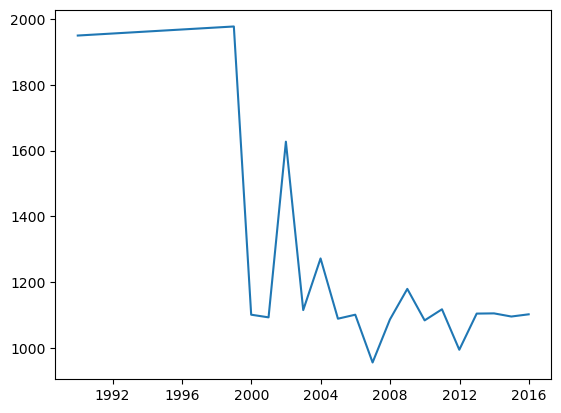

In [8]:
plt.plot(df.dates, df.shoreline)


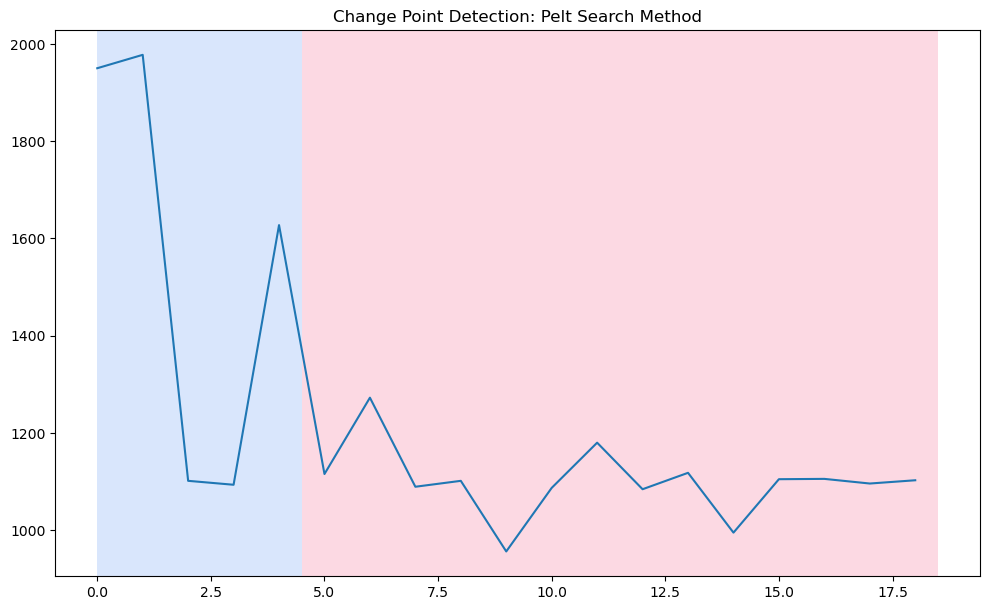

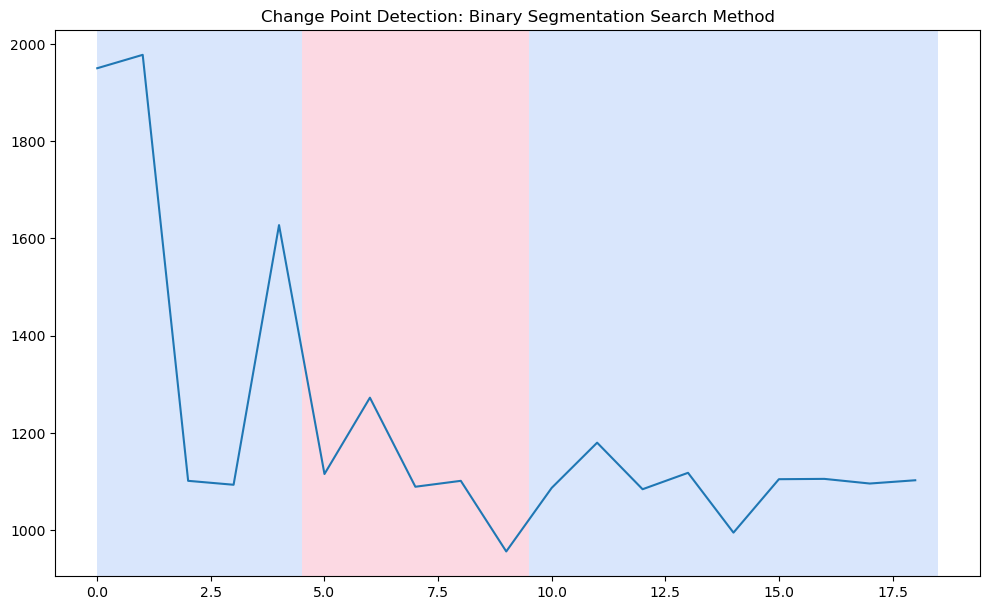

BadSegmentationParameters: 

In [52]:
points = np.array(df.shoreline)

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(np.array(df.shoreline))
result = algo.predict(pen=1)
rpt.display(np.array(df.shoreline), result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

# Google Earth Engine
Feyhoofinolhu
4.213021, 73.484718

In [24]:
lat, lon = 4.213021, 73.484718
dates = ['2021-01-01', '2022-01-01']
point = ee.Geometry.Point([lon, lat])
imageCol = ee.ImageCollection("LANDSAT/LC09/C02/T1_TOA").filterDate(dates[0], dates[1]).filterBounds(point)
image = imageCol.sort('CLOUD_COVER').first()

In [25]:
vizParams = {'bands': ['B4', 'B3', 'B2'], "min": 0, 'max': 1}

map_l8 = folium.Map(location=[lat, lon], zoom_start=11)
map_l8.add_ee_layer(image, vizParams, 'L8')
display(map_l8)

# Global Human Modification

In [34]:
dataset = ee.ImageCollection('CSP/HM/GlobalHumanModification')
dataset.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'CSP/HM/GlobalHumanModification',
 'version': 1641990114792191,
 'properties': {'system:visualization_0_min': '0.0',
  'type_name': 'ImageCollection',
  'keywords': ['csp',
   'fragmentation',
   'human_modification',
   'landcover',
   'landscape_gradient',
   'stressors',
   'tnc'],
  'thumb': 'https://mw1.google.com/ges/dd/images/CSP_HM_GlobalHumanModification_thumb.png',
  'description': '<p>The global Human Modification dataset (gHM) provides a cumulative measure of human modification\nof terrestrial lands globally at 1 square-kilometer resolution. The gHM\nvalues range from 0.0-1.0 and are calculated by estimating the proportion of a given location\n(pixel) that is modified, the estimated intensity of modification\nassociated with a given type of human modification or &quot;stressor&quot;.\n5 major anthropogenic stressors circa 2016 were mapped using 13\nindividual datasets:</p><ul><li>human settlement (population density, built-up

In [33]:
dataset = ee.ImageCollection('CSP/HM/GlobalHumanModification').first()
visualization = {'bands': ['gHM'], 'min': 0.0, 'max': 1.0, 'palette': ['0c0c0c', '071aff', 'ff0000', 'ffbd03', 'fbff05', 'fffdfd']}

map_ghm = folium.Map(location=[lat, lon], zoom_start=11)
map_ghm.add_ee_layer(dataset, visualization, 'GHM')
display(map_ghm)

# Unsupervised classification
Nauru -0.528918, 166.933360

In [12]:
lat, lon = -0.528918, 166.933360
dates = ['2016-01-01', '2022-01-01']
point = ee.Geometry.Point([lon, lat])
imageCol = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(dates[0], dates[1]).filterBounds(point)
image = imageCol.sort('CLOUD_COVER').first().select(['SR_B{}'.format(i) for i in range(1, 8)])

vizParams = {'bands': ['SR_B4', 'SR_B3', 'SR_B2']}

map_l8 = geemap.Map(location=[lat, lon], zoom_start=11)
map_l8.addLayer(image, vizParams, 'L8')
map_l8

#ee.Date(image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

Map(center=[-0.528918, 166.93336], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [18]:
image = (
    ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
    .filterBounds(point)
    .filterDate('2017-01-01', '2022-12-31')
    .sort('CLOUDY_PIXEL_PERCENTAGE')
    .first()
    .select('B[1-7]')
)

vis_params = {'min': 0, 'max': 3000, 'bands': ['B4', 'B3', 'B2']}
map_s2 = geemap.Map(center=[lat, lon], zoom=11)
map_s2.addLayer(image, vis_params, 'S2')
map_s2

Map(center=[-0.528918, 166.93336], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…

In [19]:
image.geometry()

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Image.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Image.select",
          "arguments": {
            "bandSelectors": {
              "constantValue": [
                "B[1-7]"
              ]
            },
            "input": {
              "functionInvocationValue": {
                "functionName": "Collection.first",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "Collection.limit",
                      "arguments": {
                        "collection": {
                          "functionInvocationValue": {
                            "functionName": "Collection.filter",
                            "arguments": {
                              "collection": {
                                "functionInvocationValue": {
                  

In [20]:
region = point.buffer(7000)
nlcd = ee.Image('USGS/NLCD/NLCD2016').select('landcover').clip(region)
map_s2.addLayer(nlcd, {}, 'NLCD')
map_s2

Map(bottom=66186.0, center=[-0.961258613197397, 165.43350219726565], controls=(WidgetControl(options=['positio…

In [23]:
# Make the training dataset.
points = nlcd.sample(
    **{
        'region': region,
        'scale': 30,
        'numPixels': 5000,
        'seed': 0,
        'geometries': True,  # Set this to False to ignore geometries
    }
)

print(points.size().getInfo())

0
